# Power Production - a Machine Learning project playground

>Author: **Andrzej Kocielski**  

This is a playground notebook for testing only. The actual project notebook is [Powerproduction_ML.ipynb](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/Powerproduction_ML.ipynb).

For more information see [README.md](https://github.com/andkoc001/Machine-Learning-and-Statistics-Project.git/README.MD).


___

## Importing libraries

In [1]:
import pandas as pd

## Data set

In [4]:
# Data set is loaded from the file `powerproduction.txt`.
df = pd.read_csv(r"powerproduction.txt")

In [3]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


## Import Seaborn

In [5]:
import seaborn as sns

In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ak/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylel

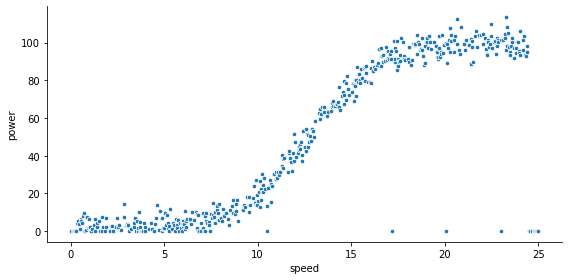

In [7]:
sns.relplot(data=df, x="speed", y="power", s=20, palette="pastel", height=4, aspect=2)
